**FIRST PROJECT : IMAGE RETRIEVAL**

> Author : Donélia MONIN




In [ ]:
from google.colab import drive

drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-3.4.2.16:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-3.4.2.16.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-3.4.2.16
Uninstalling opencv-contrib-python-3.4.2.16:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-3.4.2.16.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-3.4.2.16
  Using cached https://files.pythonhosted.org/packages/fa/7d/5042b668a8ed41d2a80b8c172f5efcd572e3c046c75ae029407e19b7fc68/opencv_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


  Using cached https://files.pythonhosted.org/packages/08/f1/66330f4042c4fb3b2d77a159db8e8916d9cdecc29bc8c1f56bc7f8a9bec9/opencv_contrib_python-3.4.2.16-cp36-cp36m-manylinux1_x86_64.whl




> We load the dataset from google drive and try to display some images. We  also store a random list of 30 images to make the test in the other parts.




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2501
{'annotation': {'folder': 'VOC2007', 'filename': '000012.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '207539885'}, 'owner': {'flickrid': 'KevBow', 'name': '?'}, 'size': {'width': '500', 'height': '333', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'car', 'pose': 'Rear', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '156', 'ymin': '97', 'xmax': '351', 'ymax': '270'}}]}}


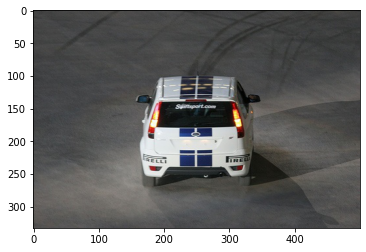

{'annotation': {'folder': 'VOC2007', 'filename': '000017.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '228217974'}, 'owner': {'flickrid': 'genewolf', 'name': 'whiskey kitten'}, 'size': {'width': '480', 'height': '364', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'person', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '185', 'ymin': '62', 'xmax': '279', 'ymax': '199'}}, {'name': 'horse', 'pose': 'Left', 'truncated': '0', 'difficult': '0', 'bndbox': {'xmin': '90', 'ymin': '78', 'xmax': '403', 'ymax': '336'}}]}}


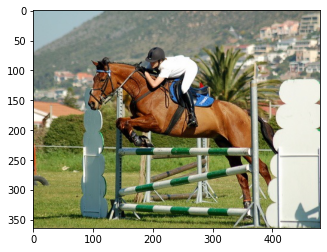

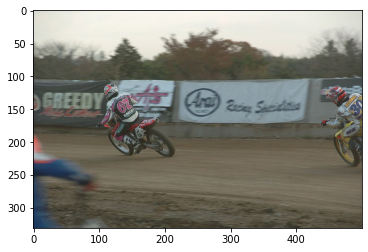

29


In [ ]:

import os
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab import drive
import torchvision.datasets as datasets
import cv2 as cv
import random 

drive.mount('/content/drive') 
path = "/content/drive/My Drive/VOC2007" 

os.chdir(path)
os.listdir(path)
voc_trainset = datasets.VOCDetection(path,year='2007', image_set='train', download=False)
print(len(voc_trainset))
image, annotation = voc_trainset[0][0],voc_trainset[0][1]
#img = cv.imread(image)
print(annotation)
show_image = np.array(image)
plt.imshow(show_image)
plt.show()

image2, annotation2 = voc_trainset[1][0],voc_trainset[1][1]
print(annotation2)
show_image2 = np.array(image2)
plt.imshow(show_image2)
plt.show()

#We save a random list of 30 images 
list_images = []
for i in range (1, 30):
  id = random.randint(1, 1000)
  img, annot = voc_trainset[id][0],voc_trainset[id][1]
  img_array = np.array(img)
  list_images.append(img_array)

plt.imshow(list_images[10])
plt.show()


print(len(list_images))



> First method : SIFT 

We construct a SIFT object, then we use it to detect keypoints in the image. 

sift.detect() allows to identify the keypoints and
sift.DrawKeypoints() allows to draw the circle on the keypoints





> 



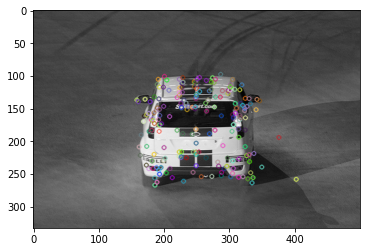

In [ ]:
import numpy as np
import cv2 as cv

gray= cv.cvtColor(show_image,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()

#Find the keypoints of the image
kp = sift.detect(gray,None)
img_=cv.drawKeypoints(gray,kp,show_image)
cv.imwrite('sift_keypoints.jpg',img_)
plt.imshow(img_)



> Second method : SIFT with flags 

This flag cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS allows to draw a circle with size of keypoint and can show its orientation.



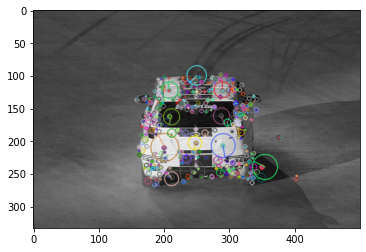

In [ ]:
gray= cv.cvtColor(show_image,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
img_=cv.drawKeypoints(gray,kp,show_image, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('sift_keypoints.jpg',img_)
plt.imshow(img_)



> Third method: SIFT with detectAndCompute() 

This method allows to find keypoints and use them to compute the descriptor.



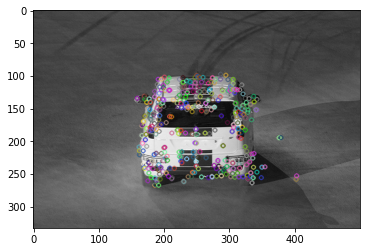

In [ ]:
sift = cv.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
img_=cv.drawKeypoints(gray,kp,show_image)
cv.imwrite('sift_keypoints.jpg',img_)
plt.imshow(img_)

> Four method : SURF Detector

We also use SURF_CREATE() of OpenCV that allows to detect keypoints.
The result is different from SIFT depending on the chosen **parameters**. We obtain more cicles of different sizes.


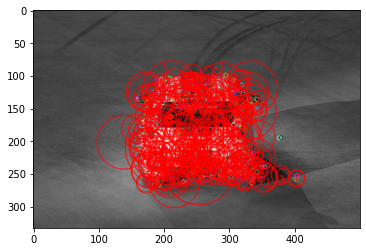

In [ ]:
# Create SURF object and set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors 
kp, des = surf.detectAndCompute(show_image,None)
kp_ = cv.drawKeypoints(show_image,kp,None,(255,0,0),4)
plt.imshow(kp_)

> SIFT and SURF allow to identify keypoints in image but with 2 different approachs. SURF seems to be faster than SIFT. 



**MATCHING PART**

We define a reference image. Then we use ORB to detect keypoints and define matching keypoints between 2 images. ORB use the descriptor of image and compare to another image.

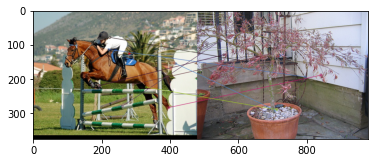

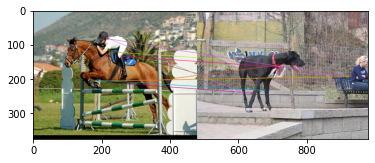

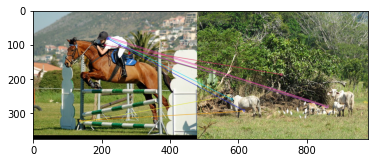

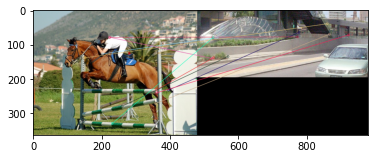

In [ ]:
# Initiate ORB detector
for i in range (1, 5):
  orb = cv.ORB_create()
  # find the keypoints and descriptors with ORB
  kp1, des1 = orb.detectAndCompute(show_image2,None)
  kp2, des2 = orb.detectAndCompute(list_images[i],None)

  # create BFMatcher object
  bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
  # Match descriptors.
  matches = bf.match(des1,des2)
  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)
  # Draw first 10 matches.
  img3 = cv.drawMatches(show_image2,kp1,list_images[i],kp2,matches[:10], None, flags=2)
  plt.imshow(img3),plt.show()




> In this part, we use SIFT to define matching between 2 images. The result is a little bit different than with ORB.


> ORB seems faster than SIFT and get keypoints more efficient than SIFT. 




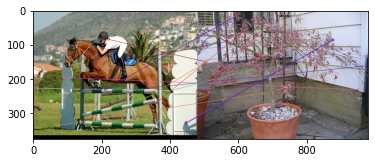

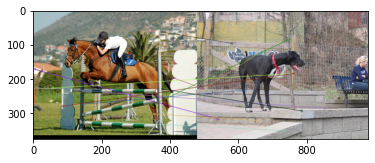

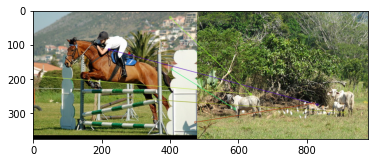

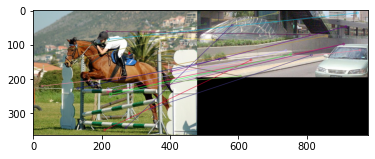

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

for i in range (1, 5):

  # Initiate SIFT detector
  sift = cv.xfeatures2d.SIFT_create()
  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(show_image2,None)
  kp2, des2 = sift.detectAndCompute(list_images[i],None)
  # BFMatcher with default params
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2, k=2)
  # Apply ratio test
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  # cv.drawMatchesKnn expects list of lists as matches.
  img3 = cv.drawMatchesKnn(show_image2,kp1,list_images[i],kp2,good,None, flags=2)
  plt.imshow(img3),plt.show()


**APPLY GEOMETRIC TRANSFORMATIONS**
> Now, we transform 3 images using differents approachs. 

> For the first image, we use warning. This method cut some parts of the image depending on the given parameters.

> For the second image, we use rotation. This method rotates the image by 90°. 


> And for the third, we use a perspective transformation.



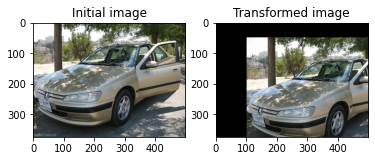

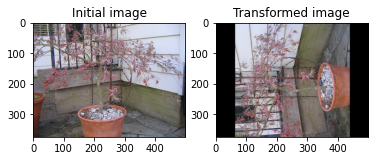

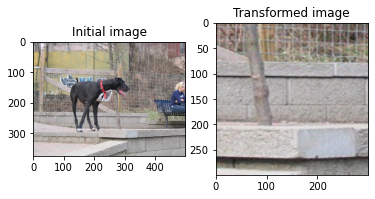

In [ ]:
import numpy as np
import cv2 as cv
rows,cols, _ = list_images[0].shape
M = np.float32([[1,0,100],[0,1,50]])
#First transformation
new_image = cv.warpAffine(list_images[0],M,(cols,rows))
plt.subplot(121),plt.imshow(list_images[0]),plt.title('Initial image')
plt.subplot(122),plt.imshow(new_image),plt.title('Transformed image')
plt.show()


#Second transformation
# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
new_image2 = cv.warpAffine(list_images[1],M,(cols,rows))
plt.subplot(121),plt.imshow(list_images[1]),plt.title('Initial image')
plt.subplot(122),plt.imshow(new_image2),plt.title('Transformed image')
plt.show()

#Third transformation
pts1 = np.float32([[250, 200],[350, 200],[250, 330],[350, 330]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
new_image3 = cv.warpPerspective(list_images[2],M,(300,300))
plt.subplot(121),plt.imshow(list_images[2]),plt.title('Initial image')
plt.subplot(122),plt.imshow(new_image3),plt.title('Transformed image')
plt.show()

#We define a list of these 3 images
ref_images = [new_image, new_image2, new_image3]


**FIND BEST MATCHING TO RETRIEVE INITIAL IMAGE**


> In this part, we use matching matching algorithm with SIFT in order to retrieve initial *image*. We compare our 3 transformed image with a set of image containing the initial image in order to find the best match which must be the initial image.




The Best match with 888 matching points is. 


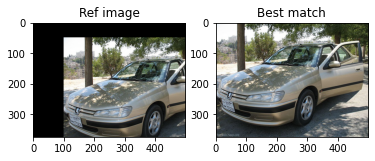

The Best match with 751 matching points is. 


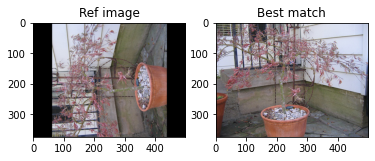

The Best match with 33 matching points is. 


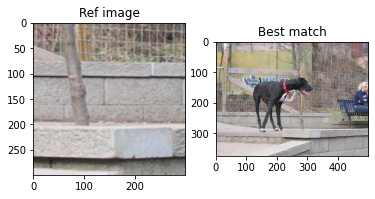

In [ ]:
for ref in ref_images:
  all_matches = []
  for train_img in list_images :
    # Initiate SIFT detector
    sift = cv.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(ref,None)
    kp2, des2 = sift.detectAndCompute(train_img,None)
    # BFMatcher with default params
    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])
    all_matches.append((len(good), train_img))
    # cv.drawMatchesKnn expects list of lists as matches.
    img3 = cv.drawMatchesKnn(ref,kp1,train_img,kp2,good,None, flags=2)
    #plt.imshow(res),plt.show() 

  best_match = sorted(all_matches, key=lambda x: x[0])[-1]
  print("The Best match with %d matching points is. "%(best_match[0]))
  plt.subplot(121),plt.imshow(ref),plt.title('Ref image')
  plt.subplot(122),plt.imshow(best_match[1]),plt.title('Best match')
  plt.show()


> The results for theses 3 images is what we expected.

